Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0519 - val_loss: 0.0389
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0374 - val_loss: 0.0371
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0369 - val_loss: 0.0368
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0367 - val_loss: 0.0362
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0362 - val_loss: 0.0358
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0358 - val_loss: 0.0355
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0355 - val_loss: 0.0358
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0354 - val_loss: 0.0356
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0356 - val_loss: 0.0352
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0351 - val_loss: 0.0350
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0349 - val_loss: 0.0350
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 

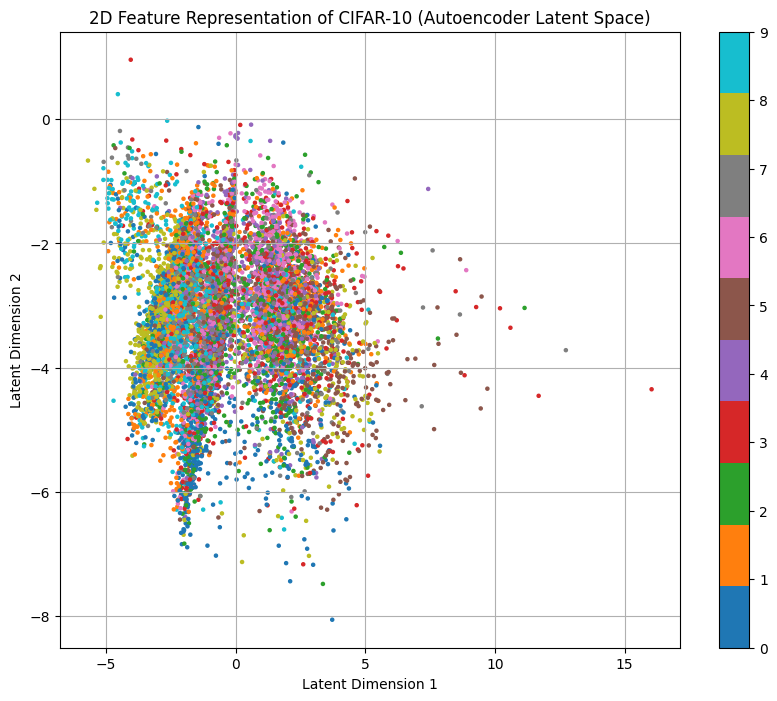

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten images for dense autoencoder
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

input_dim = x_train_flat.shape[1]

# Define the autoencoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(512, activation='relu')(input_img)
encoded = layers.Dense(128, activation='relu')(encoded)
latent  = layers.Dense(2, name="latent_features")(encoded)

decoded = layers.Dense(128, activation='relu')(latent)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)

# Compile and train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_flat, x_train_flat, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat))

# Extract the encoder part
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("latent_features").output)

# Generate 2D features from test set
features_2d = encoder.predict(x_test_flat)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y_test.flatten(), cmap='tab10', s=5)
plt.colorbar(scatter, ticks=range(10))
plt.title("2D Feature Representation of CIFAR-10 (Autoencoder Latent Space)")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.grid(True)
plt.show()
